<a href="https://colab.research.google.com/github/MatthewM287/Project/blob/main/Project_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Columns:
**"Number"** is identifying the patient, \
**"days"** which is the number of days they were measured, \
**"gender"** 1 meaning Female and 2 for male, \
**"age"** Which was divided into age groups, \
**"afftype"** Which is for which type of depression they were diagnosed with (1: bipolar II, 2: unipolar depressive, 3: bipolar I),\
**"melanch"** which shows if they have Melancholic depression, which is a form of major depressive disorder (MDD), if someone has melancholic depression they have lost pleasure in all or almost all things (1: melancholia, 2: no melancholia), \
**"inpatient"**, Inpatient meaning you need to stay in the hospital for care and outpatient meaning you don't need to be in the hospital (1: inpatient, 2: outpatient), \
**"edu"** which is education grouped in years, \
**"marriage"** 1 meaning married or cohabiting and 2 for single, \
**"work"** 1 meaning working or studying and 2 meaning unemployed/sick leave/pension), \
**"madrs1"** is MADRS score when measurement started, \
**"madrs2"** is MADRS when measurement stopped

# **MADRS**:
Stands for The Montgomery–Åsberg Depression Rating Scale. MADRS is a ten-item diagnostic questionnaire which psychiatrists use to measure the severity of depressive episodes in patients with mood disorders.
#Psychiasrist
A Psychiatrist, often confused with psychologist, are people who treat mental illnesses with medicine and help patients with medicine management. A psychologist *cannot* give medicines or prescriptions

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/MatthewM287/Project/main/scores.csv")
df_original = df.copy()
print('The dimensions of the data are: ', df.shape)
df.head(23)

The dimensions of the data are:  (55, 12)


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [ ]:
#Seeing which points are missing data
df.isna().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

The "Control" patients don't have any information past their age so they will be disreguarded (23-54). The 3 patients with NaN in the "melanch" are fine because that isn't crucial

In [ ]:
#Finding our age groups
print(df['age'].value_counts())

45-49    9
50-54    9
35-39    7
30-34    7
25-29    7
20-24    6
40-44    5
65-69    2
60-64    2
55-59    1
Name: age, dtype: int64


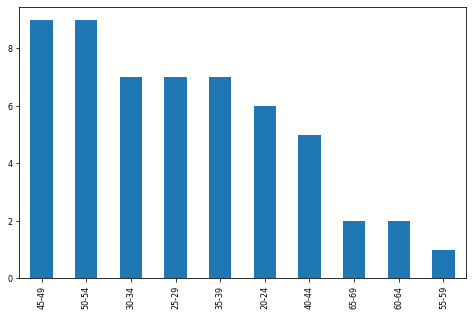

In [10]:
plt.figure(figsize=(8,5))
df['age'].value_counts().plot(kind='bar', fontsize = 8)

The Age group were're looking at is pretty spread, most middle aged people however. We are not looking at minors

In [ ]:
#Seeing how varried our data is
df.nunique()

number       55
days         11
gender        2
age          10
afftype       3
melanch       2
inpatient     2
edu           4
marriage      2
work          2
madrs1       12
madrs2       13
dtype: int64

In [ ]:
#Seeing how many males and females we have
print(df['gender'].value_counts())

1    30
2    25
Name: gender, dtype: int64


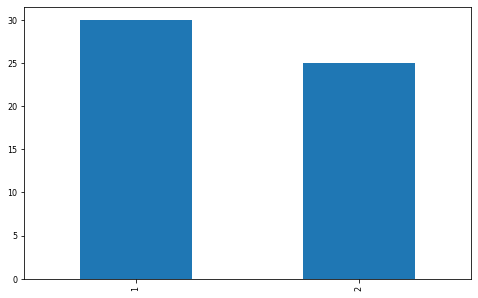

In [9]:
plt.figure(figsize=(8,5))
df['gender'].value_counts().plot(kind='bar', fontsize = 8)

Initially the gender mix looks slighty uneven, however disreguarding the "Control" people you have a more even mix. We're looking at 12 Males 11 Females

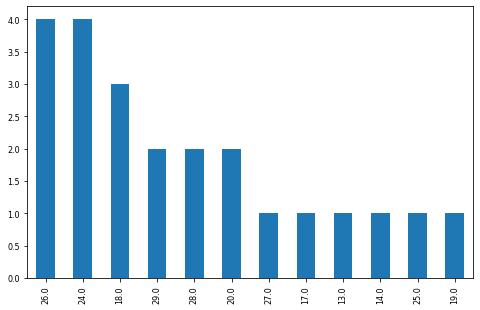

In [ ]:
#Showing madrs1
plt.figure(figsize=(8,5))
df['madrs1'].value_counts().plot(kind='bar', fontsize = 8)

The graph above shows how the majority of the numbers recorded intially were high

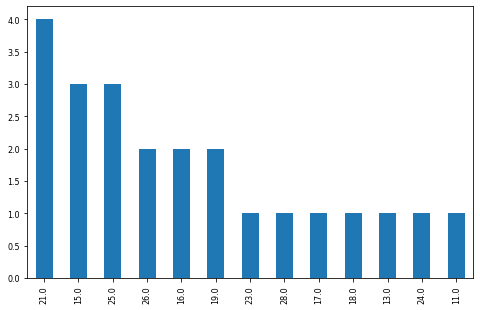

In [ ]:
#Showing madrs2
plt.figure(figsize=(8,5))
df['madrs2'].value_counts().plot(kind='bar', fontsize = 8)

And after their days were recorded most of thier MADRS scores went down

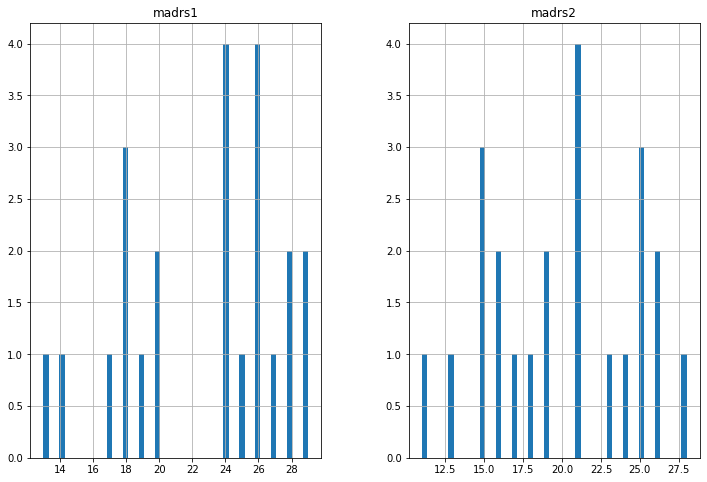

In [13]:
df_numerical = df.drop(['days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work'],axis = 1)

df_numerical.hist(bins=50, figsize=(12,8))
plt.show()

So over time The majority of the observed people's MADRS Scores went down

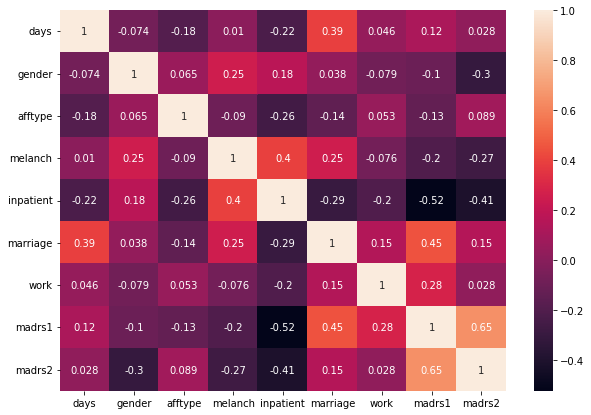

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

While initially confusing, upon closer inspection this Correlation chart tells us a lot.

**How to read a correlation chart**\
*(The way you read/understand a correlation chart is pretty simple. The close the number is to 0 the less it affects whatever your comparing. The closer it is to 1 the more it affects the thing you're comparing. if the number is negative that means while one increases or decreases, the other increases or decreases, essentially doing the opposite of the other. If the number is positive that means while one increases the other increases and vice versa)*

In [ ]:
corrMatrix["madrs1"].sort_values(ascending=False)

madrs1       1.000000
madrs2       0.653090
marriage     0.447590
work         0.281104
days         0.122678
gender      -0.104832
afftype     -0.132523
melanch     -0.202332
inpatient   -0.523501
Name: madrs1, dtype: float64

In [ ]:
corrMatrix["madrs2"].sort_values(ascending=False)

madrs2       1.000000
madrs1       0.653090
marriage     0.150551
afftype      0.088863
work         0.027913
days         0.027726
melanch     -0.270243
gender      -0.303410
inpatient   -0.410235
Name: madrs2, dtype: float64

Upon looking at the "madrs1" and "madrs2" sections in the correlation chart we can see the things with the most correlation woould be "Marriage" and "inpatient". People who seem to be married have a higher MADRS Score then those who aren't married. And those who are inpatient (Those who are being taken care of in the hospital) tend to have a higher MADRS score then those who are outpatient (Not in hospital care). However both of these numbers are relatively close to zero so they don't have too much of an impact on the MADRS score